## COMP20008 - Elements of Data Processing
### Climate Change and Road Safety Correlation
#### Made By: Leonardo Linardi (May 2018)

In [68]:
# IMPORTING

# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

# importing the datasets
ocrashes = pd.read_csv('Crashes_Last_Five_Years.csv', encoding='ISO-8859-1')
bundclim = pd.read_csv('Bundoora Monthly Climate.csv', encoding='ISO-8859-1')
mornclim = pd.read_csv('Mornington Monthly Climate.csv', encoding='ISO-8859-1')
moorclim = pd.read_csv('Moorabbin Monthly Climate.csv', encoding='ISO-8859-1')
scorclim = pd.read_csv('Scoresby Monthly Climate.csv', encoding='ISO-8859-1')
esseclim = pd.read_csv('Essendon Airport Monthly Climate.csv', encoding='ISO-8859-1')

#### PRE PROCESSING

In [69]:
# FILTERING
# filters the datasets by indexing, retrieving only the relevant data
# CRASH DATASET

# retrieve crash features to be examined
crashes = ocrashes.iloc[:,[3,6,7,9,10,12,18,22,23,24,30,31,32,33,34,38,45,46,47,50,51,52,53,-8, -1]]

# only keeps crashes data in Greater Melbourne (Melbourne Metropolitan)
crashes = crashes[crashes['STAT_DIV_NAME']=='Metro']

# creates a new ordered index for the dataset
newindex = [i for i in range(len(crashes))]
crashes.set_index(pd.Series(newindex), inplace=True, drop=True)

In [70]:
# CHANGING AXES
# CLIMATE DATASET

# Stores all the months of a year
months = []
for col in bundclim.iloc[:,1:13]:
    months.append(col)
print(months)

# Sets the index of the dataset, that will soon to be the column headers
bundclim.set_index('Statistic Element',inplace=True)
mornclim.set_index('Statistic Element',inplace=True)
moorclim.set_index('Statistic Element',inplace=True)
scorclim.set_index('Statistic Element',inplace=True)
esseclim.set_index('Statistic Element',inplace=True)

# Change the axes of the dataset
bundclim = bundclim.transpose()
mornclim = mornclim.transpose()
moorclim = moorclim.transpose()
scorclim = scorclim.transpose()
esseclim = esseclim.transpose()
esseclim

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


Statistic Element,Mean maximum temperature (Degrees C) for years 1939 to 2018,Highest temperature (Degrees C) for years 1939 to 2018,Date of Highest temperature for years 1939 to 2018,Lowest maximum temperature (Degrees C) for years 1939 to 2018,Date of Lowest maximum temperature for years 1939 to 2018,Decile 1 maximum temperature (Degrees C) for years 1939 to 2018,Decile 9 maximum temperature (Degrees C) for years 1939 to 2018,Mean number of days >= 30 Degrees C for years 1939 to 2018,Mean number of days >= 35 Degrees C for years 1939 to 2018,Mean number of days >= 40 Degrees C for years 1939 to 2018,...,Mean 9am dew point temperature (Degrees C) for years 1941 to 2010,Mean 9am relative humidity (%) for years 1941 to 2010,Mean 9am cloud cover (okas) for years 1939 to 2010,Mean 9am wind speed (km/h) for years 1939 to 2010,Mean 3pm temperature (Degrees C) for years 1939 to 2010,Mean 3pm wet bulb temperature (Degrees C) for years 1939 to 2010,Mean 3pm dew point temperature (Degrees C) for years 1941 to 2010,Mean 3pm relative humidity (%) for years 1941 to 2010,Mean 3pm cloud cover (oktas) for years 1939 to 2010,Mean 3pm wind speed (km/h) for years 1939 to 2010
January,26.5,45.8,31-Jan-68,14.7,2-Jan-41,19.6,36,8.6,4,0.9,...,10.6,60,5,17.9,24.2,16.5,10.3,46,4.1,23.6
February,25.9,47.3,7-Feb-09,13.9,18-Feb-51,19.3,34.3,7.1,2.3,0.2,...,11.9,66,5.1,16.6,23.8,16.7,11.4,49,4.4,21.6
March,24.1,40.7,4-Mar-42,13.6,22-Mar-41,18.1,31.6,4.9,1,0.1,...,10.7,68,5,15.8,22.4,15.8,10.1,48,4.6,20.4
April,20.1,35.2,10-Apr-05,10.6,21-Apr-60,15.1,26.1,0.4,0,0,...,9.1,72,5.4,15,18.7,13.5,8.6,53,5.4,20.1
May,16.3,26.7,4-May-67,8.4,27-May-51,12.8,20.3,0,0,0,...,7.6,81,5.5,15,15.1,11.4,7.6,62,5.8,19.8
June,13.7,22.6,8-Jun-05,6.7,22-Jun-50,11.2,16.5,0,0,0,...,6,84,5.6,15.6,12.7,9.8,6.6,67,5.8,19.9
July,13.1,21.9,18-Jul-13,6.1,2-Jul-68,10.5,15.7,0,0,0,...,5.1,83,5.4,17.5,11.9,9,5.6,66,5.8,22
August,14.4,24.4,27-Aug-07,6.8,9-Aug-51,11.4,17.8,0,0,0,...,5.5,79,5.2,18.5,13.1,9.5,5.6,62,5.5,23.1
September,16.8,30.3,12-Sep-09,8.3,15-Sep-57,12.7,21.4,0,0,0,...,6.3,72,5.1,20.9,15.3,10.9,6.2,57,5.4,23.8
October,19.4,36.4,12-Oct-06,10,1-Oct-57,14.2,25.8,0.8,0.1,0,...,7.3,66,5.6,20.9,17.5,12.3,7.3,54,5.5,23.3


In [71]:
# FILTERING
# CLIMATE DATASET

# Remove irrelevant data, for easier wrangling later on
bundclim = bundclim.drop(bundclim.index[-4:])
mornclim = mornclim.drop(mornclim.index[-4:])
moorclim = moorclim.drop(moorclim.index[-4:])
scorclim = scorclim.drop(scorclim.index[-4:])
esseclim = esseclim.drop(esseclim.index[-4:])

In [73]:
# MISSING VALUES SEARCH

# checks each item in the whole Crash dataset
miss=0
count=0
missval=[]
for col, series in crashes.iteritems():
    for index, val in series.iteritems():
        if (pd.isnull(val)):
            missval.append((col, val))
            miss+=1
        count+=1
print("Nan Values (Unique):", np.unique(missval))
print("Crash dataset missing values:", miss, count, miss/count*100)
print("\n")

# checks each item in the whole Bundoora Climate dataset
miss=0
count=0
missval=[]
for col, series in bundclim.iteritems():
    for index, val in series.iteritems():
        if (pd.isnull(val)):
            missval.append((col, val))
            miss+=1
        count+=1
print("Nan Values (Unique):", np.unique(missval))
print("Melbourne Climate dataset missing values:", miss, count, miss/count*100)
print("\n")

# checks each item in the whole Mornington Climate dataset
miss=0
count=0
missval=[]
for col, series in mornclim.iteritems():
    for index, val in series.iteritems():
        if (pd.isnull(val)):
            missval.append((col, val))
            miss+=1
        count+=1
print("Nan Values (Unique):", np.unique(missval))
print("Mornington Climate dataset missing values:", miss, count, miss/count*100 )
print("\n")

# checks each item in the whole Moorabbin Climate dataset
miss=0
count=0
missval=[]
for col, series in moorclim.iteritems():
    for index, val in series.iteritems():
        if (pd.isnull(val)):
            missval.append((col, val))
            miss+=1
        count+=1
print("Nan Values (Unique):", np.unique(missval))
print("Moorabbin Climate dataset missing values:", miss, count, miss/count*100 )
print("\n")

# checks each item in the whole Essendon Climate dataset
miss=0
count=0
missval=[]
for col, series in esseclim.iteritems():
    for index, val in series.iteritems():
        if (pd.isnull(val)):
            missval.append((col, val))
            miss+=1
        count+=1
print("Nan Values (Unique):", np.unique(missval))
print("Essendon Airport Climate dataset missing values:", miss, count, miss/count*100)

Nan Values (Unique): ['DAY_OF_WEEK' 'REGION_NAME' 'nan']
Crash dataset missing values: 873 1363900 0.0640076251924628


Nan Values (Unique): []
Melbourne Climate dataset missing values: 0 684 0.0


Nan Values (Unique): []
Mornington Climate dataset missing values: 0 684 0.0


Nan Values (Unique): []
Moorabbin Climate dataset missing values: 0 684 0.0


Nan Values (Unique): []
Essendon Airport Climate dataset missing values: 0 684 0.0


In [74]:
# DETECTING OUTLIERS
# CRASH DATASET

# Finding outliers on discrete data of the crash dataset
crashval1 = crashes.iloc[:,10:18]
crashval2 = crashes.iloc[:,19:23]
susc=0
outc=0
totalc=0
zeronec=0

# Finding suspected and outliers in the whole data
for col in crashval1:
    feat = crashval1[col]
    q1=feat.quantile(.25)
    q3=feat.quantile(.75)
    iqr=q3-q1
    suspected=feat[(feat > q3+1.5*iqr) | (feat < q1-1.5*iqr)]
    outliers=feat[(feat > q3+3*iqr) | (feat < q1-3*iqr)]
    totalc+=len(feat)
    susc+=len(suspected)
    outc+=len(outliers)
    for i in crashval1[col]:
        if (i==0 | i==1):
            zeronec+=1

# Finding suspected and outliers in the whole data
for col in crashval2:
    feat = crashval2[col]
    q1=feat.quantile(.25)
    q3=feat.quantile(.75)
    iqr=q3-q1
    suspected=feat[(feat > q3+1.5*iqr) | (feat < q1-1.5*iqr)]
    outliers=feat[(feat > q3+3*iqr) | (feat < q1-3*iqr)]
    totalc+=len(feat)
    susc+=len(suspected)
    outc+=len(outliers)
    for i in crashval2[col]:
        if (i==0 | i==1):
            zeronec+=1

# Outliers aren't removed as they represent important/relevant data for each crash
print("Number of zeros and ones in crash dset:", zeronec, zeronec/totalc*100)
print("Suspected:", susc, susc/totalc*100)
print("Outliers:", outc, outc/totalc*100)

Number of zeros and ones in crash dset: 177364 27.09203998338099
Suspected: 49112 7.501771879658821
Outliers: 40601 6.201731554121759


In [75]:
# DETECTING OUTLIERS
# CLIMATE DATASET

climdata = [bundclim, mornclim, moorclim, scorclim, esseclim]

susc=0
outc=0
totc=0
feat = []

# Finding suspected and outliers in the whole data
for dset in climdata:
    for col in dset:
        featraw=dset[col]
        feat = []
        
        # skips non-discrete data
        for i, val in featraw.iteritems():
            try:
                feat.append(float(val))
            except ValueError:
                pass
            
        feat = pd.Series(feat)
        q1=feat.quantile(.25)
        q3=feat.quantile(.75)
        iqr=q3-q1
        suspected=feat[(feat > q3+1.5*iqr) | (feat < q1-1.5*iqr)]
        outliers=feat[(feat > q3+3*iqr) | (feat < q1-3*iqr)]
        susc+=len(suspected)
        outc+=len(outliers)
        totc+=len(feat)

print("Total:", totc)
print("Suspected:", susc, susc/totc*100)
print("Outliers:", outc, outc/totc*100)

Total: 2652
Suspected: 51 1.9230769230769231
Outliers: 14 0.5279034690799397


In [76]:
# DUPLICATE DETECTION
# CRASH DATASET

dups=[]

# Skimming through the data, if there are duplicated data next towards each other
for i in range(len(crashes)-1):
    if crashes['ACCIDENT_NO'][i] == crashes['ACCIDENT_NO'][i+1]:
        dups.append(crashes['ACCIDENT_NO'][i])
print(len(dups), dups)  
        
# Further search to find whether each data is unique or not
if len(crashes['ACCIDENT_NO'].unique())==len(crashes):
    print("No Duplicated Data")

0 []
No Duplicated Data


#### CLASSIFICATIONS

In [77]:
# CLASSIFICATION and NEW FEATURES
# CRASH DATASET

# Determine which month each crash happens

# Method 1 - by pandas built-in function    
# accdate = pd.to_datetime(crashes['ACCIDENT_DATE'], format='%d/%m/%y')
# this step raises 'ValueError: unconverted data remains: 12' as there are errors in the data format somewhere

# Method 2 - by splitting the date by its string format, taking the month value
accdate = crashes['ACCIDENT_DATE']
accmonth = []
uncov=0

# finds the month of each crash
for i, val in accdate.iteritems():
    try:
        date = val.split("/")
        accmonth.append(months[int(date[1])-1])
    # counts and marks every unconverted data
    except:
        accmonth.append('Unconverted')
        uncov+=1
        pass

# checks if they have the same value
print(len(crashes), len(accmonth))
print("# of Unconverted Data:", uncov)

# Integrates the accident month data with the dataset
crashes['ACCIDENT_MONTH'] = pd.Series(accmonth)

# Determine which region each crash happens
regname = crashes['REGION_NAME_ALL']
accloc = []
count=0
for i, val in regname.iteritems():
    if 'NORTH' in val.split():
        accloc.append("NORTH")
    elif 'SOUTH' in val.split():
        accloc.append("SOUTH")
    else:
        count+=1
        
# checks if they have the same value
print(len(crashes), len(accloc))
print("# of crash with unique location:", count)  

crashes['REGION_NS'] = pd.Series(accloc)
#crashes

54556 54556
# of Unconverted Data: 0
54556 54556
# of crash with unique location: 0


In [78]:
# FURTHER CLASSIFICATIONS
# CRASH DATASET

# Determine what time is Early Day (before 6AM), Mid Day (between 6AM-6PM) and Night Time (after 6PM)
early = datetime.strptime("06.00.00", "%H.%M.%S")
midday = datetime.strptime("18.00.00", "%H.%M.%S")
night = datetime.strptime("23.59.59", "%H.%M.%S")
acctime = []

# Classifies the time period an accident happens
for i in range(len(crashes)):
    time = pd.to_datetime(crashes['ACCIDENT_TIME'][i], format="%H.%M.%S")
    if time <= early:
        acctime.append('EARLY')
    elif early < time <= midday:
        acctime.append('MIDDAY')
    elif midday < time <= night:
        acctime.append('NIGHT')
    else:
        print(time)
crashes['ACCIDENT_PERIOD'] = pd.Series(acctime)


In [79]:
# Classifies the different type of accidents
acctype=[]
nan=0
for i in range(len(crashes)):
    none=0
    typeraw = crashes['ACCIDENT_TYPE'][i]
    typelow = [i.lower() for i in typeraw.split()] 
    if 'collision' in typelow:
        if 'no' not in typelow:
            # if a vehicle collide with another vehicle
            if 'vehicle' in typelow:
                acctype.append("COLLISION VEH")
                none=1
            # if a vehicle collide with another fixed object
            elif 'object' in typelow:
                acctype.append("COLLISION OBJ")
                none=1
    # if a vehicle overturned (a.k.a. flipped over)
    elif 'overturned' in typelow:
        acctype.append("OVERTURNED")
        none=1
    # if a vehicle struck a pedestrian
    elif 'pedestrian' in typelow:
        acctype.append("STRUCK PEDS")
        none=1
    # all others, non major accident types
    if not none:
        acctype.append("OTHERS")
        nan+=1
        
print(nan)         
print(len(acctype), len(crashes))
crashes['ACCIDENT_TYPE_NEW'] = pd.Series(acctype)
crashes

2770
54556 54556


,ACCIDENT_NO,ACCIDENT_DATE,ACCIDENT_TIME,ACCIDENT_TYPE,DAY_OF_WEEK,HIT_RUN_FLAG,RUN_OFFROAD,NODE_TYPE,LGA_NAME,REGION_NAME,...,HEAVYVEHICLE,PASSENGERVEHICLE,MOTORCYCLE,PUBLICVEHICLE,REGION_NAME_ALL,STAT_DIV_NAME,ACCIDENT_MONTH,REGION_NS,ACCIDENT_PERIOD,ACCIDENT_TYPE_NEW
0,T20120013207,26/5/2012,11.40.00,Collision with vehicle,Saturday,No,No,Intersection,BOROONDARA,METROPOLITAN SOUTH EAST REGION,...,0,3,0,0,METROPOLITAN SOUTH EAST REGION,Metro,May,SOUTH,MIDDAY,COLLISION VEH
1,T20120013209,6/6/2012,15.40.00,Collision with vehicle,Wednesday,No,No,Intersection,PORT PHILLIP,METROPOLITAN NORTH WEST REGION,...,0,1,0,0,METROPOLITAN NORTH WEST REGION,Metro,June,NORTH,MIDDAY,COLLISION VEH
2,T20120013212,24/5/2012,09.00.00,Collision with vehicle,Thursday,No,No,Intersection,YARRA,METROPOLITAN NORTH WEST REGION,...,0,1,1,0,METROPOLITAN NORTH WEST REGION,Metro,May,NORTH,MIDDAY,COLLISION VEH
3,T20120013213,6/6/2012,17.02.00,Struck Pedestrian,Wednesday,No,No,Non-Intersection,WHITEHORSE,METROPOLITAN SOUTH EAST REGION,...,0,1,0,1,METROPOLITAN SOUTH EAST REGION,Metro,June,SOUTH,MIDDAY,STRUCK PEDS
4,T20120013219,22/5/2012,16.30.00,Collision with vehicle,Tuesday,No,No,Intersection,KNOX,METROPOLITAN SOUTH EAST REGION,...,0,2,0,0,METROPOLITAN SOUTH EAST REGION,Metro,May,SOUTH,MIDDAY,COLLISION VEH
5,T20120013223,6/6/2012,18.30.00,Struck Pedestrian,Wednesday,No,No,Non-Intersection,DAREBIN,METROPOLITAN NORTH WEST REGION,...,0,1,0,0,METROPOLITAN NORTH WEST REGION,Metro,June,NORTH,NIGHT,STRUCK PEDS
6,T20120013224,6/6/2012,15.00.00,Collision with vehicle,Wednesday,No,No,Non-Intersection,NILLUMBIK,METROPOLITAN NORTH WEST REGION,...,0,3,0,0,METROPOLITAN NORTH WEST REGION,Metro,June,NORTH,MIDDAY,COLLISION VEH
7,T20120013225,5/6/2012,17.30.00,Collision with vehicle,Tuesday,No,No,Intersection,DANDENONG,METROPOLITAN SOUTH EAST REGION,...,0,2,0,0,METROPOLITAN SOUTH EAST REGION,Metro,June,SOUTH,MIDDAY,COLLISION VEH
8,T20120013230,6/6/2012,16.15.00,Collision with vehicle,Wednesday,No,No,Intersection,MONASH,METROPOLITAN SOUTH EAST REGION,...,1,1,0,0,METROPOLITAN SOUTH EAST REGION,Metro,June,SOUTH,MIDDAY,COLLISION VEH
9,T20120013231,6/6/2012,17.48.00,Collision with vehicle,Wednesday,No,No,Non-Intersection,MELBOURNE,METROPOLITAN NORTH WEST REGION,...,0,1,0,0,METROPOLITAN NORTH WEST REGION,Metro,June,NORTH,MIDDAY,COLLISION VEH


#### PROCESSING

In [80]:
# PROCESSIONG FEATURES
# CRASH DATASET

def countvalue(greg):
    "Function to simply add up all the values/data of the crash dataset"
    totcrash.append(len(greg))
    early.append(len(greg[greg['ACCIDENT_PERIOD']=='EARLY']))
    midday.append(len(greg[greg['ACCIDENT_PERIOD']=='MIDDAY']))
    night.append(len(greg[greg['ACCIDENT_PERIOD']=='NIGHT']))
    vehcol.append(len(greg[greg['ACCIDENT_TYPE_NEW']=='COLLISION VEH']))
    objcol.append(len(greg[greg['ACCIDENT_TYPE_NEW']=='COLLISION OBJ']))
    strpeds.append(len(greg[greg['ACCIDENT_TYPE_NEW']=='STRUCK PEDS']))
    offroad.append(len(greg[greg['RUN_OFFROAD']=='Yes']))
    hitrun.append(len(greg[greg['HIT_RUN_FLAG']=='Yes']))
    serinj.append(sum(greg['SERIOUSINJURY']))
    males.append(sum(greg['MALES']))
    females.append(sum(greg['FEMALES']))
    peds.append(sum(greg['PEDESTRIAN']))
    oldd.append(sum(greg['OLD_DRIVER']))
    youngd.append(sum(greg['YOUNG_DRIVER']))
    heavy.append(sum(greg['HEAVYVEHICLE']))
    passg.append(sum(greg['PASSENGERVEHICLE']))
    motorc.append(sum(greg['MOTORCYCLE']))
    pubv.append(sum(greg['PUBLICVEHICLE']))
    return 0

# Classifies each feature counts based on month and region
[totcrash, early, midday, night, vehcol, objcol, strpeds, offroad, hitrun, serinj, males, females] = [[] for i in range(12)]
[peds, oldd, youngd, heavy, passg, motorc, pubv] = [[] for i in range(7)]

# groups the crashes by their respective months
groupmo = crashes.groupby('ACCIDENT_MONTH')

# finds each feature counts, for North Region of Greater Melbourne
for i in months:
    
    # store the values in order of year months
    for j, gmo in groupmo:
        
        # groups crashes based on their region
        groupreg = gmo.groupby('REGION_NS')
        for k, greg in groupreg:
            
            if i == j:
                if k=='NORTH':
                    # counts the value of each features
                    print(j, k)
                    countvalue(greg)

# finds each feature counts, for South Region of Greater Melbourne
for i in months:
    for j, gmo in groupmo:
        groupreg = gmo.groupby('REGION_NS')
        for k, greg in groupreg:
            if i == j:
                if k=='SOUTH':
                    print(j, k)
                    countvalue(greg)

# create a new dataframe, summing all the data of different processed features relevant to this report
mod_crashes = pd.DataFrame({'Total Number of Crash':pd.Series(totcrash), 'Early Day Crash (<=6AM)':pd.Series(early), 'Mid Day Crash (>6AM,<=6PM)':pd.Series(midday), 'Night Crash(>6PM)':pd.Series(night), 
                           'Collision with Vehicle':pd.Series(vehcol), 'Collision with Object':pd.Series(objcol), 'Struck Pedestrian':pd.Series(strpeds), 'Vehicle Run Offroad':pd.Series(offroad), 
                            'Hit and Run':pd.Series(hitrun), 'Driver Seriously Injured':pd.Series(serinj), 'Male Involved':pd.Series(males), 'Female Involved':pd.Series(females), 
                            'Pedestrians Involved':pd.Series(peds), 'Old Driver':pd.Series(oldd), 'Young Driver':pd.Series(youngd), 'Heavy Vehicles':pd.Series(heavy), 
                            'Passenger Vehicles':pd.Series(passg), 'Motorcycles':pd.Series(motorc), 'Public Vehicle':pd.Series(pubv)})
mod_crashes

January NORTH
February NORTH
March NORTH
April NORTH
May NORTH
June NORTH
July NORTH
August NORTH
September NORTH
October NORTH
November NORTH
December NORTH
January SOUTH
February SOUTH
March SOUTH
April SOUTH
May SOUTH
June SOUTH
July SOUTH
August SOUTH
September SOUTH
October SOUTH
November SOUTH
December SOUTH


,Collision with Object,Collision with Vehicle,Driver Seriously Injured,Early Day Crash (<=6AM),Female Involved,Heavy Vehicles,Hit and Run,Male Involved,"Mid Day Crash (>6AM,<=6PM)",Motorcycles,Night Crash(>6PM),Old Driver,Passenger Vehicles,Pedestrians Involved,Public Vehicle,Struck Pedestrian,Total Number of Crash,Vehicle Run Offroad,Young Driver
0,266,1440,677,186,1975,87,162,2848,1465,303,477,90,3005,246,34,214,2128,287,638
1,236,1831,740,161,2391,126,156,3451,1868,390,489,107,3695,281,44,247,2518,264,737
2,257,1972,784,184,2575,122,187,3811,1952,410,592,111,3979,326,56,284,2728,266,763
3,271,1738,713,196,2407,114,158,3348,1708,339,558,107,3587,289,45,264,2462,284,762
4,261,1943,758,175,2651,136,193,3679,1905,352,637,128,3996,364,47,310,2717,265,800
5,223,1525,627,173,2051,111,155,3120,1530,263,503,85,3277,324,46,295,2206,220,676
6,225,1578,660,141,2139,104,166,3243,1606,281,524,110,3414,331,42,300,2271,243,688
7,201,1472,583,131,1954,89,142,2834,1443,244,492,76,3144,271,28,247,2066,212,643
8,181,1355,573,122,1814,76,121,2703,1374,233,428,93,2874,260,36,236,1924,177,575
9,206,1570,700,135,2160,109,149,3017,1605,300,441,103,3241,266,42,241,2181,226,649


In [81]:
# PROCESSING FEATURES
# CLIMATE DATASET

# Gets the relevant climate features relevant to this report
# North Region
northfeat = bundclim.iloc[:,[0,1,10,11,23,33,40,41,42,43,45,48,49,50,51,54,55]]
featname = list(bundclim)[56]
essefeat = esseclim['Mean 3pm wind speed (km/h) for years 1939 to 2010 ']
northfeat = northfeat.assign(featname=essefeat.values)

# South Region
southfeat = mornclim.iloc[:,[0,1,10,11,23,33]]

southfeat[['Mean daily sunshine (hours) for years 1965 to 1979 ']] = scorclim[['Mean daily sunshine (hours) for years 1965 to 1979 ']]

southfeat[['Mean daily solar exposure (MJ/(m*m)) for years 1990 to 2018 ',
           'Mean number of clear days for years 1962 to 1975 ',
           'Mean number of cloudy days for years 1962 to 1975 ',
           'Mean 9am temperature (Degrees C) for years 1919 to 1975 ',
           'Mean 9am relative humidity (%) for years 1919 to 1963 ',
           'Mean 9am cloud cover (okas) for years 1932 to 1975 ',
           'Mean 9am wind speed (km/h) for years 1962 to 1975 ',
           'Mean 3pm temperature (Degrees C) for years 1962 to 1975 ']] = mornclim.iloc[:,[41,42,43,45,48,49,50,51]]

southfeat[['Mean 3pm relative humidity (%) for years 1971 to 2010 ']] = moorclim[['Mean 3pm relative humidity (%) for years 1971 to 2010 ']]
southfeat[['Mean 3pm cloud cover (oktas) for years 1962 to 1975 ',
           'Mean 3pm wind speed (km/h) for years 1962 to 1975 ']] = mornclim.iloc[:,[55,56]]
southfeat

C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Statistic Element,Mean maximum temperature (Degrees C) for years 1919 to 1975,Highest temperature (Degrees C) for years 1962 to 1975,Mean minimum temperature (Degrees C) for years 1919 to 1975,Lowest temperature (Degrees C) for years 1962 to 1975,Mean rainfall (mm) for years 1868 to 2017,Mean number of days of rain for years 1868 to 2017,Mean daily sunshine (hours) for years 1965 to 1979,Mean daily solar exposure (MJ/(m*m)) for years 1990 to 2018,Mean number of clear days for years 1962 to 1975,Mean number of cloudy days for years 1962 to 1975,Mean 9am temperature (Degrees C) for years 1919 to 1975,Mean 9am relative humidity (%) for years 1919 to 1963,Mean 9am cloud cover (okas) for years 1932 to 1975,Mean 9am wind speed (km/h) for years 1962 to 1975,Mean 3pm temperature (Degrees C) for years 1962 to 1975,Mean 3pm relative humidity (%) for years 1971 to 2010,Mean 3pm cloud cover (oktas) for years 1962 to 1975,Mean 3pm wind speed (km/h) for years 1962 to 1975
January,25,41.6,13.4,7.3,44.1,7.2,8.8,24.6,5.8,6.1,19.1,68,4,15.3,24.6,53,3.5,16.4
February,25,40.2,13.9,7.4,43.1,6.6,8.6,21.3,4.9,6.3,19.1,72,4.1,14.5,24.5,51,3.6,16.4
March,23.3,37.4,12.9,2.5,49,8.1,7.2,16.5,5.9,8.2,17.8,73,4.4,14.3,22.4,54,4.1,14.6
April,19.4,30.7,10.9,3.8,62.3,10.9,5.5,11.1,4.5,9.3,15,78,4.9,16,19.3,59,4.7,15.5
May,16.2,25.7,9.1,0.6,70,14,4.4,7.3,3.1,14,12.3,83,4.9,15.7,15.4,65,5.5,15.9
June,13.5,19.3,7.2,-0.6,71,14.9,3.9,6,3.2,10.6,9.8,86,5.1,16.3,13,70,5.3,16.9
July,12.8,19.3,6.5,-1.2,69.2,15.5,4.1,6.8,2.8,13.1,9.1,85,5.1,18.9,12.3,67,5.3,18.7
August,13.8,23.3,6.9,0.1,70.9,15.8,4.6,9.8,3.1,12.2,9.8,83,4.9,16.9,13.2,62,5.4,16
September,15.9,26.1,8.1,-0.6,71.5,14.5,5.4,13.5,3.3,10.8,11.8,80,4.5,17.2,14.8,61,5,16.7
October,18.1,29.4,9.5,3.4,69,13.1,6.3,18.1,2.7,12.3,14,77,4.8,15.6,17.2,58,5.2,15.8


In [82]:
# Create the climate feature headers, to be represented in the heat map 
climcolhead = ['Mean max temperature (C)', 'Highest temperature (C)', 'Mean min temperature (C)', 'Lowest temperature (C)',
           'Mean rainfall (mm)', 'Mean number of days of rain', 'Mean daily sunshine (hours)', 'Mean daily solar exposure (MJ/m^2)',
           'Mean number of clear days', 'Mean number of cloudy days', 'Mean 9am temperature (C)', 'Mean 9am humidity (%)',
           'Mean 9am cloud cover (oktas)', 'Mean 9am wind speed (km/h)', 'Mean 3pm temperature (C)', 'Mean 3pm humidity (%)',
           'Mean 3pm cloud cover (oktas)', 'Mean 3pm wind speed (km/h)']

In [83]:
# FINDING CORRELATIONS
# PEARSON CORRELATION

from sklearn import metrics

TOTAL_CLIMFEAT = 18  # total climate features to be processed

crashfeat = []   # to store the crash features, for visualizing purposes
climfeat = []    # to store the climate features, for visualizing purposes
pcorr=[]         # to store all the pearson correlations of all features from both dataset       
climtotal=pd.DataFrame()   # to store all the climate data from both north and south region

# find pearson correlations of each crash and climate features
for ccol in mod_crashes:
    # reinitialize variables and flags
    climval = []
    climallreg = []
    masterc=0
    loop=1
    
    while (loop):
        climval = []
        climallreg = []
        
        # add climate data from the north region
        currc=0
        for ncol in northfeat:
            if currc==masterc:
                # add the data of each features
                for i in northfeat[ncol]:
                    climval.append(float(i))
                    climallreg.append(float(i))
                break
            else:
                currc+=1
                
        # add climate data from the south region
        currc=0
        for scol in southfeat:
            if currc==masterc:
                # add the data of each features
                for i in southfeat[scol]:
                    climval.append(float(i))
                    climallreg.append(float(i))
                break
            else:
                currc+=1
        
        climtotal[scol] = pd.Series(climallreg)
        
        climval = pd.Series(climval, index=[i for i in range(24)])
        
        # calculates the Pearson Correlation
        pcorr.append(mod_crashes[ccol].corr(climval))
        
        masterc+=1
        if masterc==TOTAL_CLIMFEAT:
            break
    
    # sets up the data to create a dataframe for visualizing
    for i in range(TOTAL_CLIMFEAT):
        crashfeat.append(mod_crashes[ccol].name)
    for i in climcolhead:
        climfeat.append(i)
        
print(len(pcorr), len(crashfeat), len(climfeat))
correlations = pd.DataFrame({'Climate Features':climfeat, 'Crash Features':crashfeat, 'Pearson Correlation':pcorr})
correlations
#print(mutualdf)

342 342 342


,Climate Features,Crash Features,Pearson Correlation
0,Mean max temperature (C),Collision with Object,0.233869
1,Highest temperature (C),Collision with Object,0.103095
2,Mean min temperature (C),Collision with Object,0.435153
3,Lowest temperature (C),Collision with Object,0.579980
4,Mean rainfall (mm),Collision with Object,-0.180343
5,Mean number of days of rain,Collision with Object,-0.539536
6,Mean daily sunshine (hours),Collision with Object,0.273995
7,Mean daily solar exposure (MJ/m^2),Collision with Object,0.126647
8,Mean number of clear days,Collision with Object,0.817632
9,Mean number of cloudy days,Collision with Object,0.162639


In [84]:
rainmax = climtotal['Mean rainfall (mm) for years 1868 to 2017 '].max()
rainmin = climtotal['Mean rainfall (mm) for years 1868 to 2017 '].min()
cloud9max = climtotal['Mean 9am cloud cover (okas) for years 1932 to 1975 '].max()
cloud9min = climtotal['Mean 9am cloud cover (okas) for years 1932 to 1975 '].min()
print(rainmax, rainmin, cloud9max, cloud9min)
climtotal['Mean number of clear days for years 1962 to 1975 ']

71.5 42.7 5.3 4.0


0     3.6
1     4.1
2     3.4
3     2.5
4     2.3
5     1.6
6     1.4
7     2.4
8     1.1
9     2.1
10    2.8
11    1.5
12    5.8
13    4.9
14    5.9
15    4.5
16    3.1
17    3.2
18    2.8
19    3.1
20    3.3
21    2.7
22    3.4
23    3.6
Name: Mean number of clear days for years 1962 to 1975 , dtype: float64

In [85]:
# REPRESENT DATA IN A TABLE
# PEARSON CORRELATION

TOTAL_CLIMFEAT = 18

pearsondf = pd.DataFrame()

for ccol in mod_crashes:
    # reinitialize variables and flags
    climfeat = []
    masterc=0
    pcorr=[]
    loop=1
    
    while (loop):
        climfeat = []
        
        # add climate data from the north region
        currc=0
        for ncol in northfeat:
            if currc==masterc:
                # add the data of each features
                for i in northfeat[ncol]:
                    climfeat.append(float(i))
                break
            else:
                currc+=1
                
        # add climate data from the south region
        currc=0
        for scol in southfeat:
            if currc==masterc:
                # add the data of each features
                for i in southfeat[scol]:
                    climfeat.append(float(i))
                break
            else:
                currc+=1
                
        climfeat = pd.Series(climfeat, index=[i for i in range(24)])
        masterc+=1
        
        # calculates the Pearson Correlation
        pcorr.append(mod_crashes[ccol].corr(pd.Series(climfeat)))
        
        if masterc==TOTAL_CLIMFEAT:
            break
            
    pearsondf[mod_crashes[ccol].name] = pcorr

In [86]:
# Helper Commands
# To see how the data table currently look like
pearsondf['Climate Features'] = pd.Series(climcolhead)
pearsondf.set_index('Climate Features', inplace=True)
pearsondf

,Collision with Object,Collision with Vehicle,Driver Seriously Injured,Early Day Crash (<=6AM),Female Involved,Heavy Vehicles,Hit and Run,Male Involved,"Mid Day Crash (>6AM,<=6PM)",Motorcycles,Night Crash(>6PM),Old Driver,Passenger Vehicles,Pedestrians Involved,Public Vehicle,Struck Pedestrian,Total Number of Crash,Vehicle Run Offroad,Young Driver
Climate Features,,,,,,,,,,,,,,,,,,,
Mean max temperature (C),0.233869,0.148380,0.309052,0.449666,0.024182,0.186499,0.172434,0.182965,0.190689,0.597181,-0.128701,-0.081073,-0.022710,-0.357928,0.213140,-0.379921,0.156873,0.307896,-0.054326
Highest temperature (C),0.103095,0.078489,0.200896,0.415151,-0.083998,0.211003,0.191792,0.118528,0.095731,0.550228,-0.180372,-0.193445,-0.129150,-0.373077,0.246915,-0.386655,0.067763,0.188544,-0.162200
Mean min temperature (C),0.435153,0.214213,0.477779,0.392269,0.188133,0.069099,0.041613,0.224073,0.319894,0.624138,-0.116005,0.148507,0.132608,-0.384303,0.102581,-0.415642,0.252319,0.499038,0.121899
Lowest temperature (C),0.579980,0.001674,0.454939,0.121292,0.138764,-0.214560,-0.269405,0.013215,0.200067,0.371182,-0.315062,0.365013,0.071481,-0.578617,-0.170897,-0.622285,0.081459,0.632595,0.084992
Mean rainfall (mm),-0.180343,-0.391593,-0.199142,-0.586846,-0.203868,-0.437643,-0.495752,-0.505483,-0.355181,-0.620331,-0.375009,0.147222,-0.214873,-0.201046,-0.303919,-0.192464,-0.427867,-0.245618,-0.188037
Mean number of days of rain,-0.539536,-0.252024,-0.544405,-0.384933,-0.272236,-0.074387,0.009788,-0.269352,-0.381757,-0.630250,0.087208,-0.244860,-0.208657,0.383087,-0.045036,0.411533,-0.306043,-0.601560,-0.206800
Mean daily sunshine (hours),0.273995,-0.094376,0.224264,0.119991,-0.102443,-0.072197,-0.125745,-0.087413,0.026646,0.361600,-0.405673,0.036252,-0.167883,-0.617615,-0.048500,-0.629418,-0.073979,0.370093,-0.163042
Mean daily solar exposure (MJ/m^2),0.126647,-0.257057,0.080496,0.070202,-0.288559,-0.092069,-0.112716,-0.235731,-0.159875,0.220302,-0.521142,-0.096563,-0.352974,-0.672918,-0.026686,-0.692857,-0.250838,0.221172,-0.359138
Mean number of clear days,0.817632,0.252664,0.671109,0.061928,0.484997,-0.245988,-0.338415,0.205919,0.485587,0.440771,-0.045160,0.626163,0.424242,-0.354591,-0.375307,-0.373574,0.362757,0.860464,0.525509


In [87]:
# TARGET FEATURE & RANKING

import seaborn as sns

# Target Feature: Collision with Vehicle, Struck Pedestrians
# Rank the other featres correlations up, with absolute values
pearsondf2 = pearsondf.copy()
vehpear = pearsondf2.reindex(pearsondf2['Collision with Vehicle'].abs().sort_values(ascending=False).index)
pedpear = pearsondf2.reindex(pearsondf2['Struck Pedestrian'].abs().sort_values(ascending=False).index)
vehpear = vehpear['Collision with Vehicle']
pedpear = pedpear['Struck Pedestrian']

print(vehpear)
print(pedpear)


Climate Features
Mean 9am wind speed (km/h)           -0.395309
Mean rainfall (mm)                   -0.391593
Mean 3pm cloud cover (oktas)         -0.258910
Mean daily solar exposure (MJ/m^2)   -0.257057
Mean number of clear days             0.252664
Mean number of days of rain          -0.252024
Mean 3pm wind speed (km/h)           -0.223371
Mean min temperature (C)              0.214213
Mean 3pm temperature (C)              0.189801
Mean number of cloudy days           -0.160509
Mean 9am humidity (%)                 0.148645
Mean max temperature (C)              0.148380
Mean 9am temperature (C)              0.130231
Mean daily sunshine (hours)          -0.094376
Mean 9am cloud cover (oktas)         -0.086237
Highest temperature (C)               0.078489
Mean 3pm humidity (%)                -0.049885
Lowest temperature (C)                0.001674
Name: Collision with Vehicle, dtype: float64
Climate Features
Mean daily solar exposure (MJ/m^2)   -0.692857
Mean daily sunshine (hours) 

In [88]:
# MOST IMPACTFUL/CORRELATED FEATURE

# Finds the most related climate and crash feature
correlations.sort_values(by='Pearson Correlation', ascending=False).head()

,Climate Features,Crash Features,Pearson Correlation
314,Mean number of clear days,Vehicle Run Offroad,0.860464
8,Mean number of clear days,Collision with Object,0.817632
44,Mean number of clear days,Driver Seriously Injured,0.671109
211,Mean 9am wind speed (km/h),Old Driver,0.666882
309,Lowest temperature (C),Vehicle Run Offroad,0.632595


#### VISUALIZATION

Text(0.5,1,'Heatmap of Pearson Correlations of various crash accident features with climate features (2012-2017)')

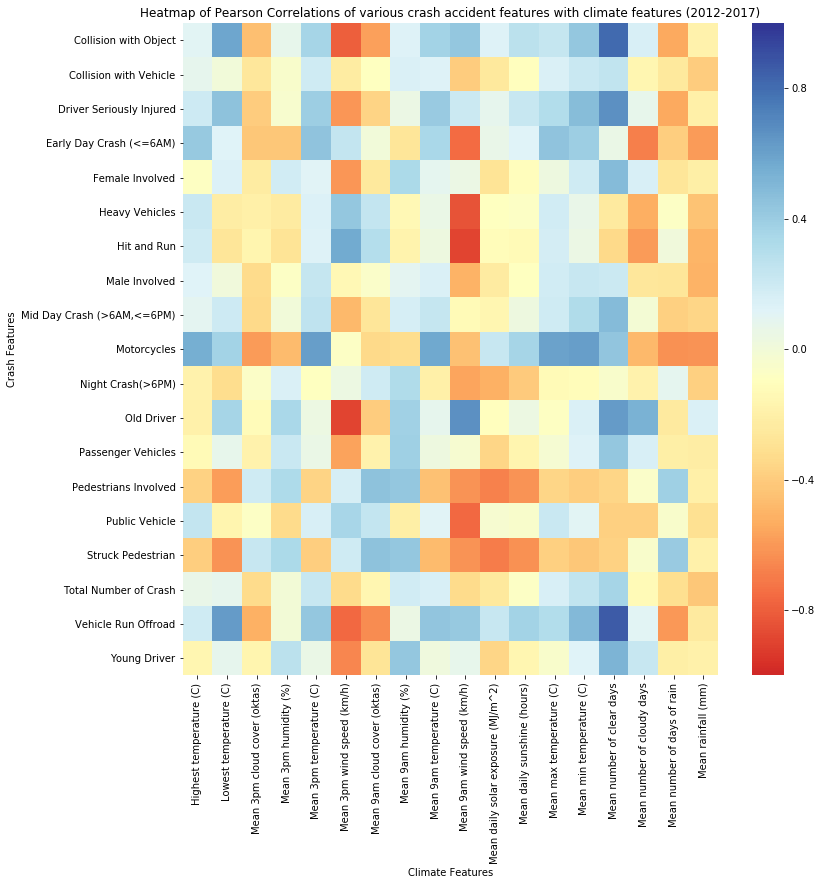

In [89]:
# VISUALIZATION
# HEATMAP

import seaborn as sns

# Visualize the Pearson Correlation of each features of crash and climate dataset
pearsoncorr = correlations.pivot(index='Crash Features', columns='Climate Features', values='Pearson Correlation')
focus = pearsoncorr.loc["Collision with Vehicle", "Mean daily sunshine (hours)"]

# Code adapted from https://python-graph-gallery.com
fig = plt.figure(figsize=(12,12))
#, annot=True, fmt=".2f"
#, center=focus
r = sns.heatmap(pearsoncorr, cmap='RdYlBu', vmin=-1, vmax=1, center=focus)
r.set_title("Heatmap of Pearson Correlations of various crash accident features with climate features (2012-2017)")


In [90]:
vehpear

Climate Features
Mean 9am wind speed (km/h)           -0.395309
Mean rainfall (mm)                   -0.391593
Mean 3pm cloud cover (oktas)         -0.258910
Mean daily solar exposure (MJ/m^2)   -0.257057
Mean number of clear days             0.252664
Mean number of days of rain          -0.252024
Mean 3pm wind speed (km/h)           -0.223371
Mean min temperature (C)              0.214213
Mean 3pm temperature (C)              0.189801
Mean number of cloudy days           -0.160509
Mean 9am humidity (%)                 0.148645
Mean max temperature (C)              0.148380
Mean 9am temperature (C)              0.130231
Mean daily sunshine (hours)          -0.094376
Mean 9am cloud cover (oktas)         -0.086237
Highest temperature (C)               0.078489
Mean 3pm humidity (%)                -0.049885
Lowest temperature (C)                0.001674
Name: Collision with Vehicle, dtype: float64

In [91]:
#mod_crashes
climtotal.head()

,Mean maximum temperature (Degrees C) for years 1919 to 1975,Highest temperature (Degrees C) for years 1962 to 1975,Mean minimum temperature (Degrees C) for years 1919 to 1975,Lowest temperature (Degrees C) for years 1962 to 1975,Mean rainfall (mm) for years 1868 to 2017,Mean number of days of rain for years 1868 to 2017,Mean daily sunshine (hours) for years 1965 to 1979,Mean daily solar exposure (MJ/(m*m)) for years 1990 to 2018,Mean number of clear days for years 1962 to 1975,Mean number of cloudy days for years 1962 to 1975,Mean 9am temperature (Degrees C) for years 1919 to 1975,Mean 9am relative humidity (%) for years 1919 to 1963,Mean 9am cloud cover (okas) for years 1932 to 1975,Mean 9am wind speed (km/h) for years 1962 to 1975,Mean 3pm temperature (Degrees C) for years 1962 to 1975,Mean 3pm relative humidity (%) for years 1971 to 2010,Mean 3pm cloud cover (oktas) for years 1962 to 1975,Mean 3pm wind speed (km/h) for years 1962 to 1975
0,26.7,44.5,14.3,5.5,46.6,9.2,7.9,24.3,3.6,4.8,18.8,66.0,4.8,11.5,24.0,46.0,4.3,23.6
1,26.9,46.5,14.2,4.5,42.7,7.4,7.9,21.1,4.1,4.0,18.8,69.0,4.6,9.7,23.5,46.0,4.1,21.6
2,24.4,40.5,12.6,2.4,43.5,9.7,6.7,16.5,3.4,5.4,17.0,70.0,4.6,9.9,22.6,48.0,4.1,20.4
3,20.5,34.4,9.8,-0.1,57.0,11.4,5.6,11.2,2.5,6.0,14.7,73.0,4.8,9.1,19.9,52.0,5.0,20.1
4,16.7,26.8,8.0,-1.2,51.0,13.8,4.0,7.5,2.3,6.7,11.6,81.0,5.3,7.9,16.3,60.0,4.5,19.8


In [92]:
# VAT Function - adapted from Workshop Week 6
def VAT(R):
    """

    VAT algorithm adapted from matlab version:
    http://www.ece.mtu.edu/~thavens/code/VAT.m

    Args:
        R (n*n double): Dissimilarity data input
        R (n*D double): vector input (R is converted to sq. Euclidean distance)
    Returns:
        RV (n*n double): VAT-reordered dissimilarity data
        C (n int): Connection indexes of MST in [0,n)
        I (n int): Reordered indexes of R, the input data in [0,n)
    """
        
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
        
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)


    I = i[j]
    del J[I]

    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):   
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)        
        y = np.min(y)      
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    
    return RV.tolist(), C, I


In [93]:
# DIMENSIONALITY REDUCTION

# Finding which climate feature that gives different impact in crashes
pearsondf = pearsondf.transpose()
pearsondf

Climate Features,Mean max temperature (C),Highest temperature (C),Mean min temperature (C),Lowest temperature (C),Mean rainfall (mm),Mean number of days of rain,Mean daily sunshine (hours),Mean daily solar exposure (MJ/m^2),Mean number of clear days,Mean number of cloudy days,Mean 9am temperature (C),Mean 9am humidity (%),Mean 9am cloud cover (oktas),Mean 9am wind speed (km/h),Mean 3pm temperature (C),Mean 3pm humidity (%),Mean 3pm cloud cover (oktas),Mean 3pm wind speed (km/h)
Collision with Object,0.233869,0.103095,0.435153,0.579980,-0.180343,-0.539536,0.273995,0.126647,0.817632,0.162639,0.368018,0.128696,-0.577349,0.427081,0.364863,0.074531,-0.454656,-0.802567
Collision with Vehicle,0.148380,0.078489,0.214213,0.001674,-0.391593,-0.252024,-0.094376,-0.257057,0.252664,-0.160509,0.130231,0.148645,-0.086237,-0.395309,0.189801,-0.049885,-0.258910,-0.223371
Driver Seriously Injured,0.309052,0.200896,0.477779,0.454939,-0.199142,-0.544405,0.224264,0.080496,0.671109,0.074618,0.406896,0.041918,-0.366486,0.203859,0.391367,-0.034065,-0.393558,-0.617066
Early Day Crash (<=6AM),0.449666,0.415151,0.392269,0.121292,-0.586846,-0.384933,0.119991,0.070202,0.061928,-0.680131,0.347623,-0.272881,0.002053,-0.757389,0.450011,-0.424790,-0.418390,0.244228
Female Involved,0.024182,-0.083998,0.188133,0.138764,-0.203868,-0.272236,-0.102443,-0.288559,0.484997,0.162756,0.091182,0.343379,-0.252780,0.040574,0.115254,0.186251,-0.221868,-0.614030
Heavy Vehicles,0.186499,0.211003,0.069099,-0.214560,-0.437643,-0.074387,-0.072197,-0.092069,-0.245988,-0.523903,0.061178,-0.137357,0.243902,-0.838079,0.134628,-0.232475,-0.199149,0.431537
Hit and Run,0.172434,0.191792,0.041613,-0.269405,-0.495752,0.009788,-0.125745,-0.112716,-0.338415,-0.587627,0.026484,-0.177031,0.299598,-0.892594,0.125397,-0.283834,-0.164450,0.563136
Male Involved,0.182965,0.118528,0.224073,0.013215,-0.505483,-0.269352,-0.087413,-0.235731,0.205919,-0.262581,0.147372,0.100691,-0.054866,-0.507476,0.226646,-0.070822,-0.329802,-0.134023
"Mid Day Crash (>6AM,<=6PM)",0.190689,0.095731,0.319894,0.200067,-0.355181,-0.381757,0.026646,-0.159875,0.485587,-0.014576,0.230949,0.171555,-0.271842,-0.131493,0.263528,0.001771,-0.343051,-0.482815
Motorcycles,0.597181,0.550228,0.624138,0.371182,-0.620331,-0.630250,0.361600,0.220302,0.440771,-0.479644,0.574329,-0.313233,-0.341974,-0.448033,0.624795,-0.474813,-0.591427,-0.070640


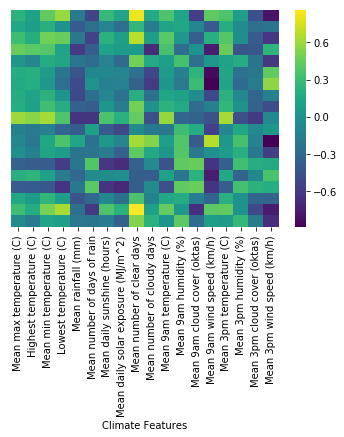

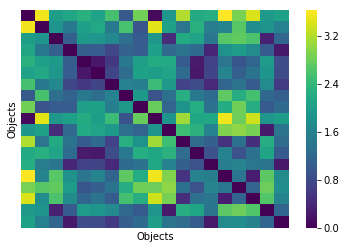

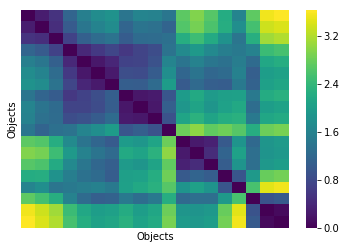

In [94]:
# VAT - adapted from Workshop Week 6 and modified to suit the dataset

from scipy.spatial.distance import pdist, squareform

# Finding clusters in the climate features, are there climate features that gives similar impacts?
sns.heatmap(pearsondf,cmap='viridis',xticklabels=True,yticklabels=False)
plt.show()

# Visualise the dissimilarity matrix using a heatmap (without applying VAT)
pearsondf2=pearsondf.copy().as_matrix()
np.random.shuffle(pearsondf2)   # randomise the order of rows (objects)
sq = squareform(pdist(pearsondf2))   # commpute the dissimilarity matrix
ax=sns.heatmap(sq,cmap='viridis',xticklabels=False,yticklabels=False)
ax.set(xlabel='Objects', ylabel='Objects')
plt.show()

# Apply VAT Algorithm and visualise using heatmap
RV, C, I = VAT(pearsondf)
x=sns.heatmap(RV,cmap='viridis',xticklabels=False,yticklabels=False)
x.set(xlabel='Objects', ylabel='Objects')
plt.show()


In [95]:
pearsondf

Climate Features,Mean max temperature (C),Highest temperature (C),Mean min temperature (C),Lowest temperature (C),Mean rainfall (mm),Mean number of days of rain,Mean daily sunshine (hours),Mean daily solar exposure (MJ/m^2),Mean number of clear days,Mean number of cloudy days,Mean 9am temperature (C),Mean 9am humidity (%),Mean 9am cloud cover (oktas),Mean 9am wind speed (km/h),Mean 3pm temperature (C),Mean 3pm humidity (%),Mean 3pm cloud cover (oktas),Mean 3pm wind speed (km/h)
Collision with Object,0.233869,0.103095,0.435153,0.579980,-0.180343,-0.539536,0.273995,0.126647,0.817632,0.162639,0.368018,0.128696,-0.577349,0.427081,0.364863,0.074531,-0.454656,-0.802567
Collision with Vehicle,0.148380,0.078489,0.214213,0.001674,-0.391593,-0.252024,-0.094376,-0.257057,0.252664,-0.160509,0.130231,0.148645,-0.086237,-0.395309,0.189801,-0.049885,-0.258910,-0.223371
Driver Seriously Injured,0.309052,0.200896,0.477779,0.454939,-0.199142,-0.544405,0.224264,0.080496,0.671109,0.074618,0.406896,0.041918,-0.366486,0.203859,0.391367,-0.034065,-0.393558,-0.617066
Early Day Crash (<=6AM),0.449666,0.415151,0.392269,0.121292,-0.586846,-0.384933,0.119991,0.070202,0.061928,-0.680131,0.347623,-0.272881,0.002053,-0.757389,0.450011,-0.424790,-0.418390,0.244228
Female Involved,0.024182,-0.083998,0.188133,0.138764,-0.203868,-0.272236,-0.102443,-0.288559,0.484997,0.162756,0.091182,0.343379,-0.252780,0.040574,0.115254,0.186251,-0.221868,-0.614030
Heavy Vehicles,0.186499,0.211003,0.069099,-0.214560,-0.437643,-0.074387,-0.072197,-0.092069,-0.245988,-0.523903,0.061178,-0.137357,0.243902,-0.838079,0.134628,-0.232475,-0.199149,0.431537
Hit and Run,0.172434,0.191792,0.041613,-0.269405,-0.495752,0.009788,-0.125745,-0.112716,-0.338415,-0.587627,0.026484,-0.177031,0.299598,-0.892594,0.125397,-0.283834,-0.164450,0.563136
Male Involved,0.182965,0.118528,0.224073,0.013215,-0.505483,-0.269352,-0.087413,-0.235731,0.205919,-0.262581,0.147372,0.100691,-0.054866,-0.507476,0.226646,-0.070822,-0.329802,-0.134023
"Mid Day Crash (>6AM,<=6PM)",0.190689,0.095731,0.319894,0.200067,-0.355181,-0.381757,0.026646,-0.159875,0.485587,-0.014576,0.230949,0.171555,-0.271842,-0.131493,0.263528,0.001771,-0.343051,-0.482815
Motorcycles,0.597181,0.550228,0.624138,0.371182,-0.620331,-0.630250,0.361600,0.220302,0.440771,-0.479644,0.574329,-0.313233,-0.341974,-0.448033,0.624795,-0.474813,-0.591427,-0.070640


Variance explained by each PC [0.62617514 0.34892171]


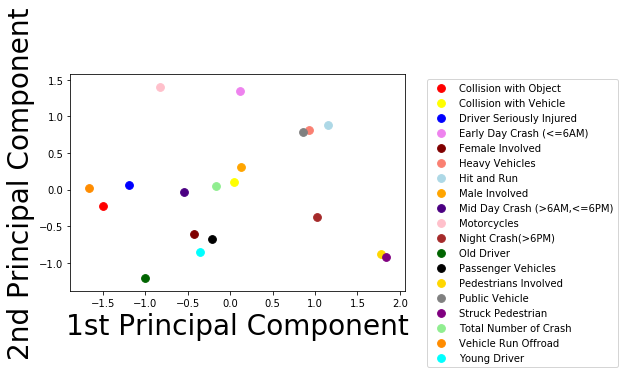

In [97]:
# PCA METHOD - adapted from Workshop Week 6 and modified to suit the dataset

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

pearsondf2 = pearsondf.copy()
climfeats = pearsondf2.index.values
pearsondf2['Clim Features'] = climfeats

sklearn_pca = sklearnPCA(n_components=2)
pearsondf_sklearn = sklearn_pca.fit_transform(pearsondf)
print("Variance explained by each PC",sklearn_pca.explained_variance_ratio_)

# Set up the colour scheme
palette=palette = ['red', 'yellow', 'blue', 'violet', 'maroon','salmon', 'lightblue', 'orange', 'indigo', 'pink', 'brown', 'darkgreen','black','gold', 'gray', 'purple', 'lightgreen','darkorange', 'cyan']

# Plot the objects along the first two principal components, using the colour scheme
for i in range(len(pearsondf_sklearn)):
    plt.scatter(pearsondf_sklearn[i][0],pearsondf_sklearn[i][1],s=60, c=palette[i], label=climfeats[i])   # Plot the PC's in 2D
plt.xlabel('1st Principal Component', fontsize=28)
plt.ylabel('2nd Principal Component', fontsize=28)
plt.legend(loc=9, bbox_to_anchor=(1.35, 1.0))
plt.show()

In [98]:
climtotal.head()

,Mean maximum temperature (Degrees C) for years 1919 to 1975,Highest temperature (Degrees C) for years 1962 to 1975,Mean minimum temperature (Degrees C) for years 1919 to 1975,Lowest temperature (Degrees C) for years 1962 to 1975,Mean rainfall (mm) for years 1868 to 2017,Mean number of days of rain for years 1868 to 2017,Mean daily sunshine (hours) for years 1965 to 1979,Mean daily solar exposure (MJ/(m*m)) for years 1990 to 2018,Mean number of clear days for years 1962 to 1975,Mean number of cloudy days for years 1962 to 1975,Mean 9am temperature (Degrees C) for years 1919 to 1975,Mean 9am relative humidity (%) for years 1919 to 1963,Mean 9am cloud cover (okas) for years 1932 to 1975,Mean 9am wind speed (km/h) for years 1962 to 1975,Mean 3pm temperature (Degrees C) for years 1962 to 1975,Mean 3pm relative humidity (%) for years 1971 to 2010,Mean 3pm cloud cover (oktas) for years 1962 to 1975,Mean 3pm wind speed (km/h) for years 1962 to 1975
0,26.7,44.5,14.3,5.5,46.6,9.2,7.9,24.3,3.6,4.8,18.8,66.0,4.8,11.5,24.0,46.0,4.3,23.6
1,26.9,46.5,14.2,4.5,42.7,7.4,7.9,21.1,4.1,4.0,18.8,69.0,4.6,9.7,23.5,46.0,4.1,21.6
2,24.4,40.5,12.6,2.4,43.5,9.7,6.7,16.5,3.4,5.4,17.0,70.0,4.6,9.9,22.6,48.0,4.1,20.4
3,20.5,34.4,9.8,-0.1,57.0,11.4,5.6,11.2,2.5,6.0,14.7,73.0,4.8,9.1,19.9,52.0,5.0,20.1
4,16.7,26.8,8.0,-1.2,51.0,13.8,4.0,7.5,2.3,6.7,11.6,81.0,5.3,7.9,16.3,60.0,4.5,19.8


In [99]:
extremes = climtotal[['Mean number of clear days for years 1962 to 1975 ', 'Mean 9am wind speed (km/h) for years 1962 to 1975 ',
                     'Mean 3pm wind speed (km/h) for years 1962 to 1975 ', 'Lowest temperature (Degrees C) for years 1962 to 1975 ']]
knntarget = extremes.copy()

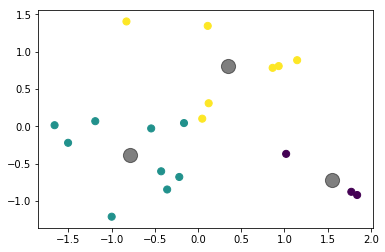

In [101]:
# K-Means Clusterings with K=3

from sklearn.cluster import KMeans
crashes[crashes['ACCIDENT_TYPE_NEW']=='COLLISION VEH']
kmeans = KMeans(n_clusters=3)
kmeans.fit(pearsondf_sklearn)
y_kmeans = kmeans.predict(pearsondf_sklearn)

plt.scatter(pearsondf_sklearn[:, 0], pearsondf_sklearn[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [102]:
# K NEAREST NEIGHBOUR

from sklearn import neighbors
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

# Target Feature: Collision with Vehicle, Struck Pedestrian = People Involved in crash
peopleinv = mod_crashes['Collision with Vehicle'] + mod_crashes['Struck Pedestrian']

# Determines the bin size
pmax = peopleinv.max()
pmin = peopleinv.min()
prange = pmax-pmin
pinc = prange/3
#print(pmax,pmin,prange,pinc)

# Classifies Low, Medium, High chance of people involved in a crash (3 Equal-Width Bin)
peoplecl=[]
for i in peopleinv:
    if pmin <= i <= pmin+pinc:
        peoplecl.append("Low")
    elif pmin+pinc < i <= pmin+pinc*2:
        peoplecl.append("Medium")
    elif pmin+pinc*2 < i <= pmax:
        peoplecl.append("High")
        
print(pmin, pmin+pinc)
print(pmin+pinc, pmin+pinc*2)
print(pmin+pinc*2, pmax)
    
#knntarget = climtotal.copy()
knntarget['People Involved'] = pd.Series(peoplecl)

# Changing the data format
for col in knntarget.iloc[:,:-1]:
    for val in knntarget[col]:
        knntarget[col] = knntarget[col].replace(to_replace=val, value=int(val))
        
# KNN - adapted from Workshop Week 8 and modified to suit the dataset
# Get the features
data=knntarget.iloc[:,:-1]

# Get the class labels
classlabel=knntarget['People Involved']

# Randomly select 66% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.6, random_state=42)

# Normalise the data to have 0 mean and unit variance using the library functions
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


print(X_train.shape)

1505 1755.3333333333333
1755.3333333333333 2005.6666666666667
2005.6666666666667 2256
(14, 4)


In [103]:
# KNN - adapted from Workshop Week 8 and modified to suit the dataset
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [104]:
# KNN - adapted from Workshop Week 8 and modified to suit the dataset
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.4


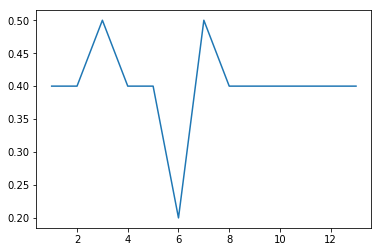

In [105]:
# KNN - adapted from Workshop Week 8 and modified to suit the dataset
# Finding the best k value to reach the max accuracy
ks = range(1,X_train.shape[0])
accu_list=[]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    accu_list.append(accuracy_score(y_test, y_pred))
    

plt.plot(ks,accu_list)
plt.show()

In [106]:
# Decision Tree Classifier - adapted from Workshop Week 8 and modified to suit the dataset
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=1, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [107]:
y_pred=dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6
